In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
N = 2000 # samples
dt = 0.01 # time interval
t = np.arange(0, N*dt, dt)
f = np.sin(2*np.pi*t) + np.sin(2*np.pi*3*t) + np.sin(2*np.pi*t/4.0)

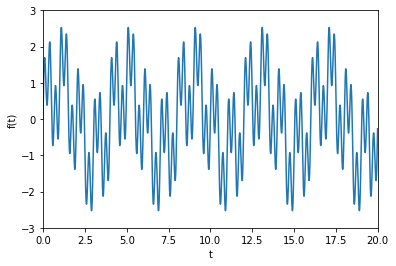

In [4]:
# plot the waveform
fig1 = plt.figure()
plt.plot(t, f)
plt.xlim(0, N*dt)
plt.ylim(-3, 3)
plt.xlabel("t")
plt.ylabel("f(t)")
plt.show()

Now let's compute the power spectrum using 
$$P(f) = |V(f)|^2+|V(-f)|^2 = 2|V(f)|^2$$

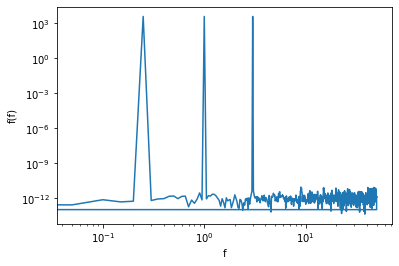

In [5]:
f_trans = np.fft.fft(f)

power = 2*np.abs(f_trans)*2
freqs = np.fft.fftfreq(N, dt)
#freqs = np.fft.fftshift(freqs) # fft output is positive freqs then negative freqs. Use this shift to fix ordering
#power = np.fft.fftshift(power)
fig2 = plt.figure()
plt.loglog(freqs, power)
plt.xlabel('f')
plt.ylabel('f(f)')
plt.show()


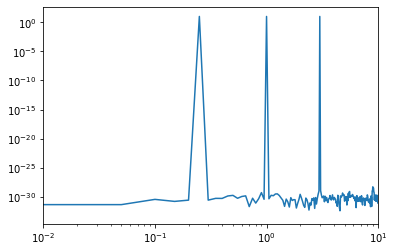

In [6]:
# let's check to see if this agrees with the scipy built in function
from scipy.signal import periodogram
F, Pxx_den = periodogram(f, 1/dt)
plt.figure()
plt.loglog(F, Pxx_den)
plt.xlim(10**(-2), 10)
plt.show()

49.90234375
(512,) (2000,)


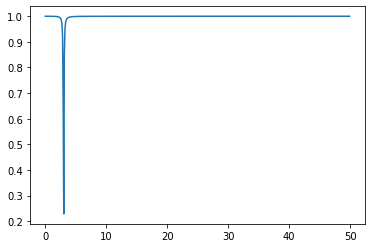

In [7]:
# use a notch filter from scipy
from scipy import signal
fs = 1/dt  # Sample frequency (Hz)
f0 = 3  # Frequency to be removed from signal (Hz)
Q = 30.0  # Quality factor
b, a = signal.iirnotch(f0, Q, fs)
freq, h = signal.freqz(b, a, fs=fs)
plt.figure()
plt.plot(freq, np.real(h))
print(freq[-1])
print(np.shape(h), np.shape(f_trans))

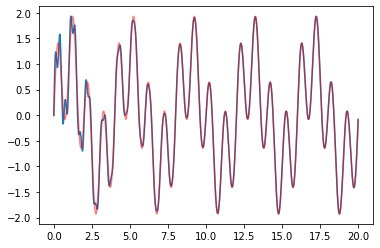

In [8]:
y = signal.filtfilt(b, a, f)
plt.figure()
plt.plot(t, y)
plt.plot(t, np.sin(2*np.pi*t) + np.sin(2*np.pi*t/4.0), 'r', alpha=0.5)